In [208]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [209]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [210]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [211]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [212]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [213]:
# View all of the classes that automap found
Base.classes.keys()


['measurement', 'station']

In [214]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [215]:
# Create our session (link) from Python to the DB
session = Session(engine)


display(session.query(measurement).first().__dict__)
display(session.query(station).first().__dict__)

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x27b4e8bc5c0>,
 'date': '2010-01-01',
 'id': 1,
 'prcp': 0.08,
 'station': 'USC00519397',
 'tobs': 65.0}

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x27b4e8bc8d0>,
 'longitude': -157.8168,
 'name': 'WAIKIKI 717.2, HI US',
 'id': 1,
 'elevation': 3.0,
 'latitude': 21.2716,
 'station': 'USC00519397'}

# Exploratory Precipitation Analysis

In [216]:
# Find the most recent date in the data set.
latest_date = engine.execute('SELECT date FROM measurement ORDER BY date DESC LIMIT 1').fetchall()[0][0]
display(latest_date)

'2017-08-23'

,date,prcp
date,,
2016-08-23,2016-08-23,0.00
2016-08-23,2016-08-23,NaN
2016-08-23,2016-08-23,1.79
2016-08-23,2016-08-23,0.05
2016-08-23,2016-08-23,0.15
...,...,...
2017-08-22,2017-08-22,0.00
2017-08-23,2017-08-23,0.00
2017-08-23,2017-08-23,0.00


Text(0, 0.5, 'Inches')

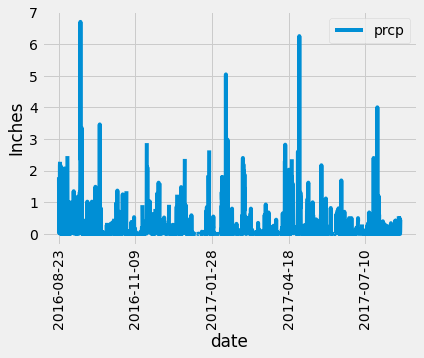

In [217]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
engine.execute("SELECT date('2017-08-23', '-1 year')").fetchall()

# Perform a query to retrieve the data and precipitation scores
query = engine.execute("SELECT * FROM measurement WHERE date BETWEEN '2016-08-23' AND '2017-08-23'").fetchall()

# Save the query results as a Pandas DataFrame and set the index to the date column
query_df = pd.DataFrame(query).drop([0, 1, 4],axis=1)
query_df.columns = ['date', 'prcp']
query_df = query_df.set_index(query_df['date'])


# Sort the dataframe by date
query_df = query_df.sort_index()
display(query_df)

# Use Pandas Plotting with Matplotlib to plot the data
query_df.plot()
plt.xticks(rotation=90)
plt.ylabel("Inches")



In [218]:
# Use Pandas to calcualte the summary statistics for the precipitation data
display(query_df['prcp'].describe())

count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: prcp, dtype: float64

# Exploratory Station Analysis

In [219]:
# Design a query to calculate the total number stations in the dataset
engine.execute("SELECT COUNT(DISTINCT station) FROM measurement").fetchall()


[(9,)]

In [220]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
engine.execute("SELECT  station, count(station) FROM measurement GROUP BY station ORDER BY COUNT(station) DESC;").fetchall()


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [221]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
display(engine.execute("SELECT MIN(tobs) FROM measurement WHERE station = 'USC00519281';").fetchall())
display(engine.execute("SELECT MAX(tobs) FROM measurement WHERE station = 'USC00519281';").fetchall())
display(engine.execute("SELECT AVG(tobs) FROM measurement WHERE station = 'USC00519281';").fetchall())

[(54.0,)]

[(85.0,)]

[(71.66378066378067,)]

,Temperature,Date
Date,,
2016-08-23,77.0,2016-08-23
2016-08-24,77.0,2016-08-24
2016-08-25,80.0,2016-08-25
2016-08-26,80.0,2016-08-26
2016-08-27,75.0,2016-08-27
...,...,...
2017-08-14,77.0,2017-08-14
2017-08-15,77.0,2017-08-15
2017-08-16,76.0,2017-08-16


Text(0, 0.5, 'Frequency')

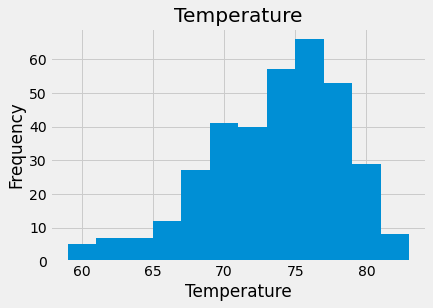

In [222]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
query_temp = engine.execute("SELECT tobs, date FROM measurement WHERE station = 'USC00519281' AND date BETWEEN '2016-08-23' AND '2017-08-23'").fetchall()
query_temp_df = pd.DataFrame(query_temp)
query_temp_df.columns = ['Temperature', 'Date']
query_temp_df = query_temp_df.set_index(query_temp_df['Date'])


# Sort the dataframe by date
query_temp_df = query_temp_df.sort_index()
display(query_temp_df)

# Use Pandas Plotting with Matplotlib to plot the data
query_temp_df.hist(bins = 12)
plt.xlabel("Temperature")
plt.ylabel("Frequency")


# Close session

In [223]:
# Close Session
session.close()